# **EVALUACIÓN NUMERO 1**

Data sets 1.	Heart Disease (Cleveland Dataset) Link "https://archive.ics.uci.edu/dataset/45/heart+disease" #Recomendacin importar

Carga e importacion del Data Sets

In [2]:
# Instalar la librería ucimlrepo
!pip install ucimlrepo

# Importar la librería
from ucimlrepo import fetch_ucirepo

# Descargar el dataset (Heart Disease, ID = 45 en UCI)
heart_disease = fetch_ucirepo(id=45)

# Obtener los datos como DataFrames de pandas
X = heart_disease.data.features
y = heart_disease.data.targets

# Mostrar metadatos del dataset
print(heart_disease.metadata)

# Mostrar información de las variables
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Limpieza de Datos y Normalizacion

In [3]:

# Importar librerías necesarias
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# === Paso 1: Cargar el dataset desde UCI ===
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# === Paso 2: Mostrar primeras filas (inspección inicial) ===
print("Primeras filas del dataset:")
display(X.head())

# === Paso 3: Verificar y limpiar valores nulos ===
print("Valores nulos por columna:")
display(X.isnull().sum())

# Unir X e y para limpiar conjuntamente
df = X.copy()
df['target'] = y

# Eliminar filas con valores nulos
df_clean = df.dropna()

# Separar de nuevo en X e y limpios
X_clean = df_clean.drop('target', axis=1)
y_clean = df_clean['target']

# === Paso 4: Convertir variables categóricas si las hay ===
# Si hay columnas tipo "object" (categóricas), convertirlas
if X_clean.select_dtypes(include='object').shape[1] > 0:
    X_clean = pd.get_dummies(X_clean, drop_first=True)

# === Paso 5: Normalizar los datos (Min-Max) ===
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_clean)

# Convertir a DataFrame con nombres de columnas
X_normalized = pd.DataFrame(X_normalized, columns=X_clean.columns)

# === Datos finales listos para clasificación ===
print("Dimensiones de X:", X_normalized.shape)
print("Distribución de y:")
print(y_clean.value_counts())



Primeras filas del dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


Valores nulos por columna:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Dimensiones de X: (297, 13)
Distribución de y:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


Exploracion y comprension de los datos

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mostrar primeras filas del dataset
print("Primeras filas del dataset clínico:")
display(X_clean.head())

# Tipos de datos
print("Tipos de variables (Edad, Sexo, Presión, etc.):")
print(X_clean.dtypes)

# Ver resumen estadístico
print("\nEstadísticas clínicas generales:")
display(X_clean.describe(percentiles=[.25, .5, .75]))

# Ver valores únicos
print("\nValores únicos por variable:")
print(X_clean.nunique())


Primeras filas del dataset clínico:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


Tipos de variables (Edad, Sexo, Presión, etc.):
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Estadísticas clínicas generales:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000



Valores únicos por variable:
age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
dtype: int64


Visualizacion


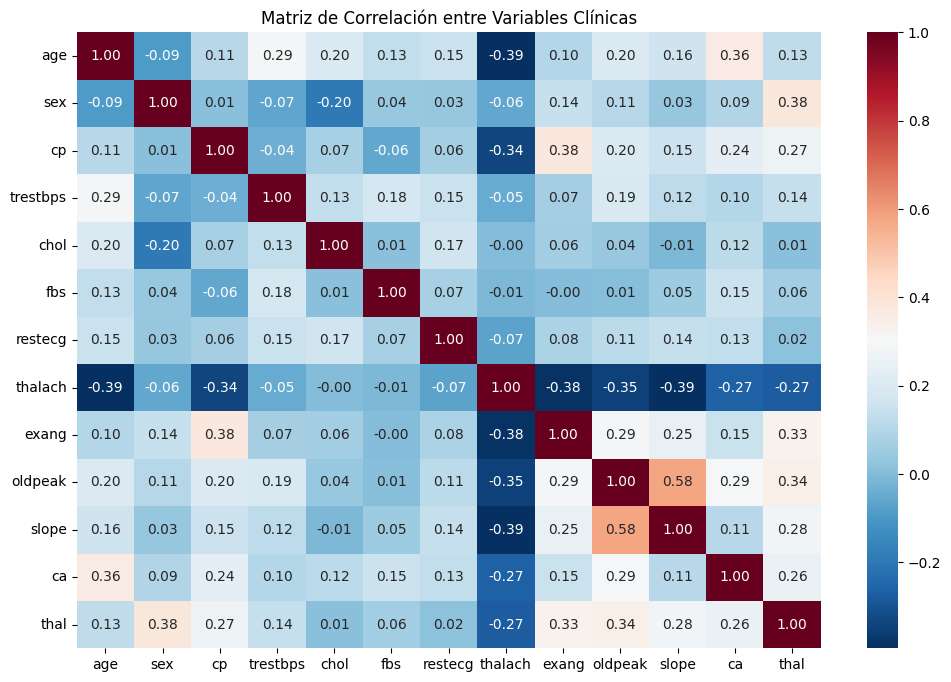

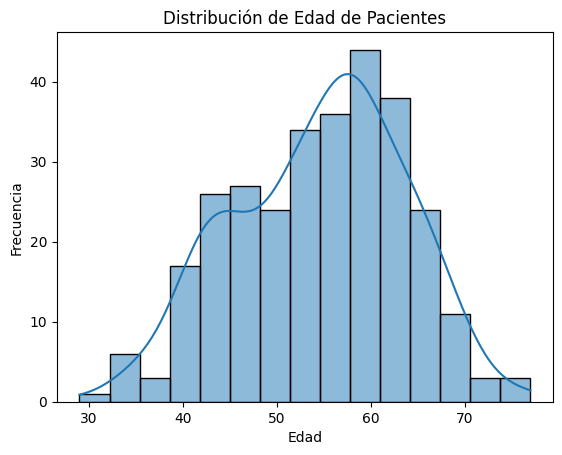

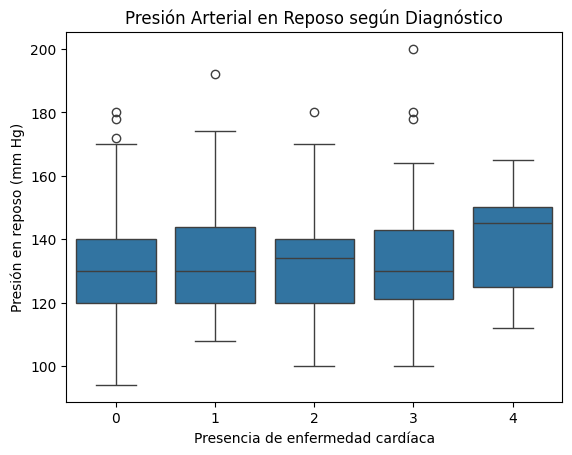

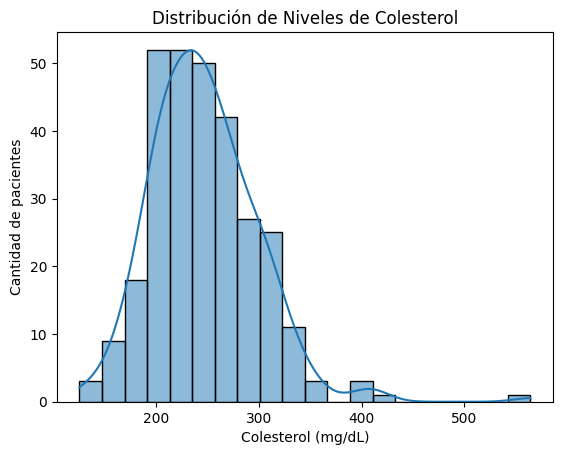

In [5]:
# Matriz de correlación entre variables clínicas
plt.figure(figsize=(12, 8))
sns.heatmap(X_clean.corr(), annot=True, cmap='RdBu_r', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Clínicas")
plt.show()

# Histograma: Distribución de edad
sns.histplot(X_clean['age'], kde=True, bins=15)
plt.title("Distribución de Edad de Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Presión arterial (ejemplo)
if 'trestbps' in X_clean.columns:
    sns.boxplot(x=y_clean, y=X_clean['trestbps'])
    plt.title("Presión Arterial en Reposo según Diagnóstico")
    plt.xlabel("Presencia de enfermedad cardíaca")
    plt.ylabel("Presión en reposo (mm Hg)")
    plt.show()

# Distribución de colesterol
if 'chol' in X_clean.columns:
    sns.histplot(X_clean['chol'], kde=True, bins=20)
    plt.title("Distribución de Niveles de Colesterol")
    plt.xlabel("Colesterol (mg/dL)")
    plt.ylabel("Cantidad de pacientes")
    plt.show()


Outliers y Relaciones Clínicas

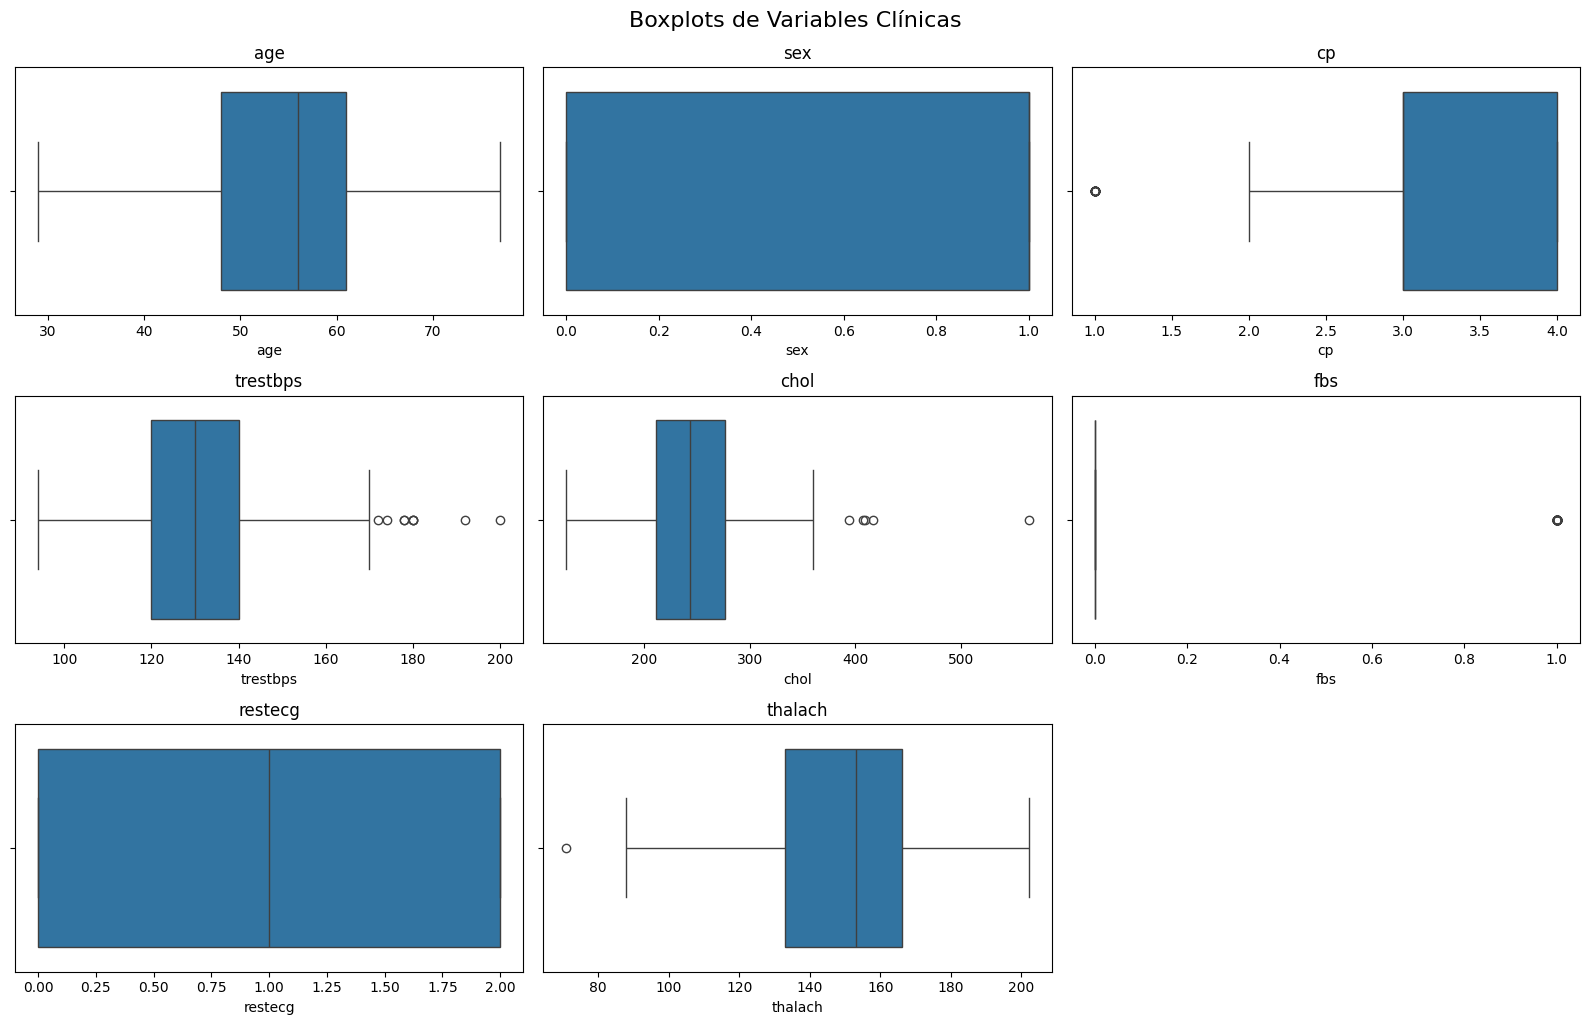

¿Qué variables se relacionan más con la enfermedad cardíaca?
ca          0.521178
thal        0.513377
oldpeak     0.501461
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
dtype: float64


In [7]:
# Boxplots de variables clínicas (para detectar outliers)
plt.figure(figsize=(16, 10))
for i, col in enumerate(X_clean.columns[:8]):  # limitar a primeras columnas para mejor visual
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=X_clean[col])
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots de Variables Clínicas", y=1.02, fontsize=16)
plt.show()

# Análisis de correlación clínica
print("¿Qué variables se relacionan más con la enfermedad cardíaca?")
correlations = X_clean.corrwith(y_clean).sort_values(ascending=False)
print(correlations)


Selección de Objetivo: Clasificación Médica


Objetivo clínico: Clasificar pacientes con o sin enfermedad cardíaca (target)

Distribución de diagnóstico (0 = No enfermedad, 1 = Presencia):
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


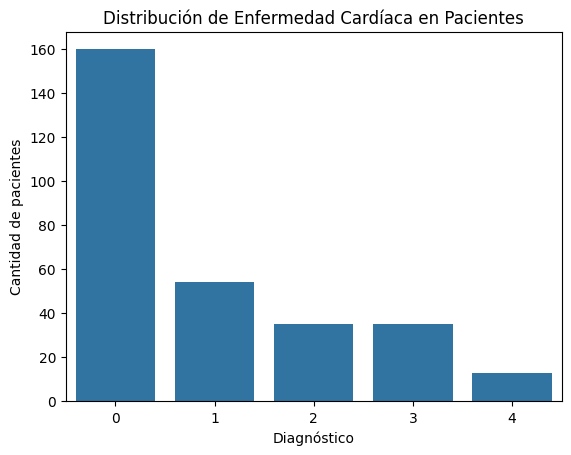

In [8]:
print("\nObjetivo clínico: Clasificar pacientes con o sin enfermedad cardíaca (target)\n")
print("Distribución de diagnóstico (0 = No enfermedad, 1 = Presencia):")
print(y_clean.value_counts())

# Visualización del balance de clases
sns.countplot(x=y_clean)
plt.title("Distribución de Enfermedad Cardíaca en Pacientes")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de pacientes")
plt.show()


Reducción de dimensionalidad mediante PCA

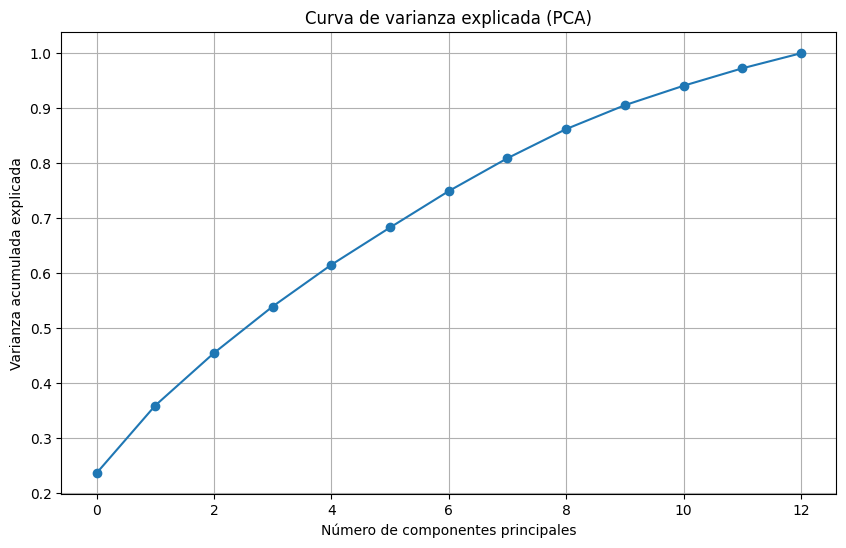

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# 1. Separar X e y
X = df.drop('target', axis=1)
y = df['target']

# 2. Imputación de valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 3. Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Curva de varianza explicada
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada explicada')
plt.title('Curva de varianza explicada (PCA)')
plt.grid(True)
plt.show()



Aplicacion de métodos predictivos (RLM – RP – RL).

🔹 Regresión Lineal Múltiple (RLM)
MAE:  0.6401
RMSE: 0.8468
R²:   0.5686

🔹 Regresión Polinomial (RP) grado 2
MAE:  0.9016
RMSE: 1.1271
R²:   0.2359

🔹 Regresión Logística (RL)
Accuracy: 0.5410
Matriz de confusión:
[[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]
Reporte de clasificación:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61

Accuracy promedio (k-fold): 0.5907
Desviación estándar: 0.0390


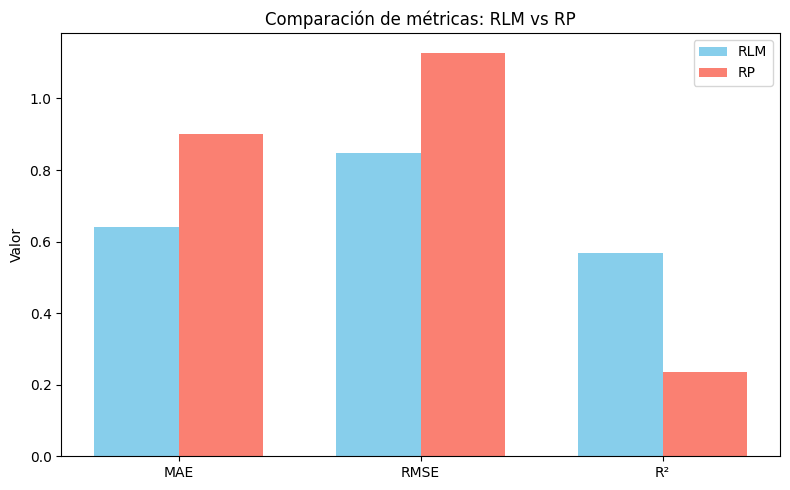

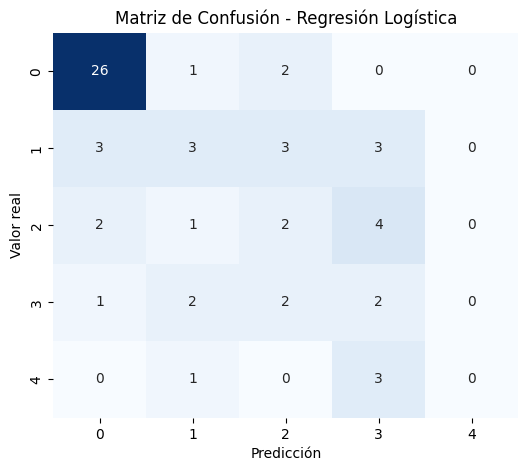

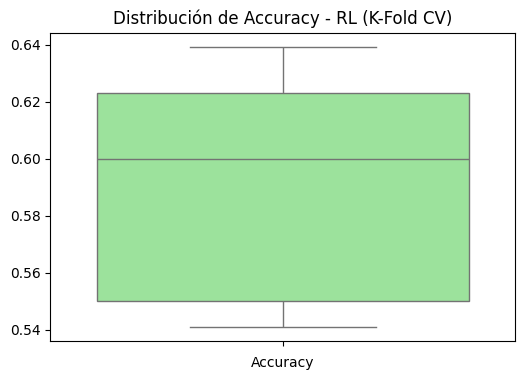

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicialización de K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ===== REGRESIÓN LINEAL MÚLTIPLE (RLM) =====
print("🔹 Regresión Lineal Múltiple (RLM)")

rlm = LinearRegression()
rlm.fit(X_train, y_train)
y_pred_rlm = rlm.predict(X_test)

mae_rlm = mean_absolute_error(y_test, y_pred_rlm)
rmse_rlm = np.sqrt(mean_squared_error(y_test, y_pred_rlm))
r2_rlm = r2_score(y_test, y_pred_rlm)

print(f"MAE:  {mae_rlm:.4f}")
print(f"RMSE: {rmse_rlm:.4f}")
print(f"R²:   {r2_rlm:.4f}\n")

# ===== REGRESIÓN POLINOMIAL (RP) grado 2 =====
print("🔹 Regresión Polinomial (RP) grado 2")

rp = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
rp.fit(X_train, y_train)
y_pred_rp = rp.predict(X_test)

mae_rp = mean_absolute_error(y_test, y_pred_rp)
rmse_rp = np.sqrt(mean_squared_error(y_test, y_pred_rp))
r2_rp = r2_score(y_test, y_pred_rp)

print(f"MAE:  {mae_rp:.4f}")
print(f"RMSE: {rmse_rp:.4f}")
print(f"R²:   {r2_rp:.4f}\n")

# ===== REGRESIÓN LOGÍSTICA (CLASIFICACIÓN) =====
print("🔹 Regresión Logística (RL)")

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_rl = logreg.predict(X_test)

acc_rl = accuracy_score(y_test, y_pred_rl)

print(f"Accuracy: {acc_rl:.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rl))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rl))

# Validación cruzada para RL
cv_scores_rl = cross_val_score(logreg, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Accuracy promedio (k-fold): {cv_scores_rl.mean():.4f}")
print(f"Desviación estándar: {cv_scores_rl.std():.4f}")

# ==============================
# GRÁFICOS
# ==============================

# 1. Comparación de métricas de regresión (RLM vs RP)
metricas = ['MAE', 'RMSE', 'R²']
rlm_scores = [mae_rlm, rmse_rlm, r2_rlm]
rp_scores = [mae_rp, rmse_rp, r2_rp]

x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, rlm_scores, width, label='RLM', color='skyblue')
plt.bar(x + width/2, rp_scores, width, label='RP', color='salmon')
plt.xticks(x, metricas)
plt.ylabel("Valor")
plt.title("Comparación de métricas: RLM vs RP")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Matriz de confusión para RL
cm = confusion_matrix(y_test, y_pred_rl)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

# 3. Boxplot de scores de validación cruzada (RL)
plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores_rl, color='lightgreen')
plt.title("Distribución de Accuracy - RL (K-Fold CV)")
plt.xlabel("Accuracy")
plt.show()


Mejora de Moldelo de Regresion logistica porque es la mas baja

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definimos la rejilla de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # fuerza de regularización inversa
    'penalty': ['l2'],                      # penalización (l2 es la más común)
    'solver': ['lbfgs', 'liblinear']        # algoritmos de optimización
}

# Configuración del modelo base
logreg = LogisticRegression(max_iter=1000)

# Búsqueda con validación cruzada (k-fold = 5)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_logreg = grid_search.best_estimator_

# Evaluar en el conjunto de prueba
y_pred_best = best_logreg.predict(X_test)

# Mostrar resultados
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 Mejor modelo de Regresión Logística tras GridSearchCV")
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Accuracy en test: {accuracy_score(y_test, y_pred_best):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_best))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_best))


🔹 Mejor modelo de Regresión Logística tras GridSearchCV
Mejores parámetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy en test: 0.5410
Matriz de confusión:
[[27  1  1  0  0]
 [ 5  2  2  3  0]
 [ 3  0  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.33      0.17      0.22        12
           2       0.29      0.22      0.25         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.31      0.32      0.30        61
weighted avg       0.48      0.54      0.50        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Extraccion de Conocimiento

Variables ordenadas por importancia (valor absoluto del coeficiente RL):
    Variable  Coeficiente
11        ca    -0.674490
12      thal    -0.409213
2         cp    -0.381760
1        sex    -0.374083
9    oldpeak    -0.348149
8      exang    -0.310412
10     slope    -0.275503
4       chol    -0.225929
7    thalach     0.212115
3   trestbps    -0.175826
6    restecg    -0.141114
0        age    -0.112319
5        fbs     0.101033


<ipython-input-19-4e939c7e411a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')


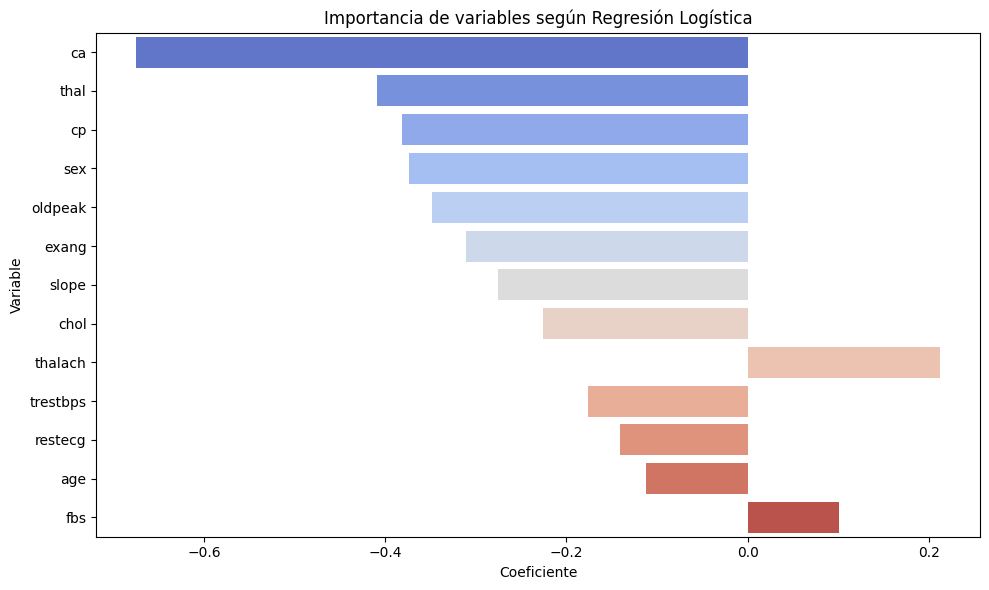

In [19]:
import pandas as pd

# Suponiendo que X_scaled es un numpy array y tienes los nombres de columnas en feature_names
feature_names = X.columns  # Ajusta esto según tu dataframe original

# Coeficientes de Regresión Logística (RL)
coef_logreg = best_logreg.coef_[0] if 'best_logreg' in globals() else logreg.coef_[0]

coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coef_logreg
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("Variables ordenadas por importancia (valor absoluto del coeficiente RL):")
print(coef_df)

# Gráfico de barras coeficientes
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')
plt.title('Importancia de variables según Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


Visualizacion de correlacion

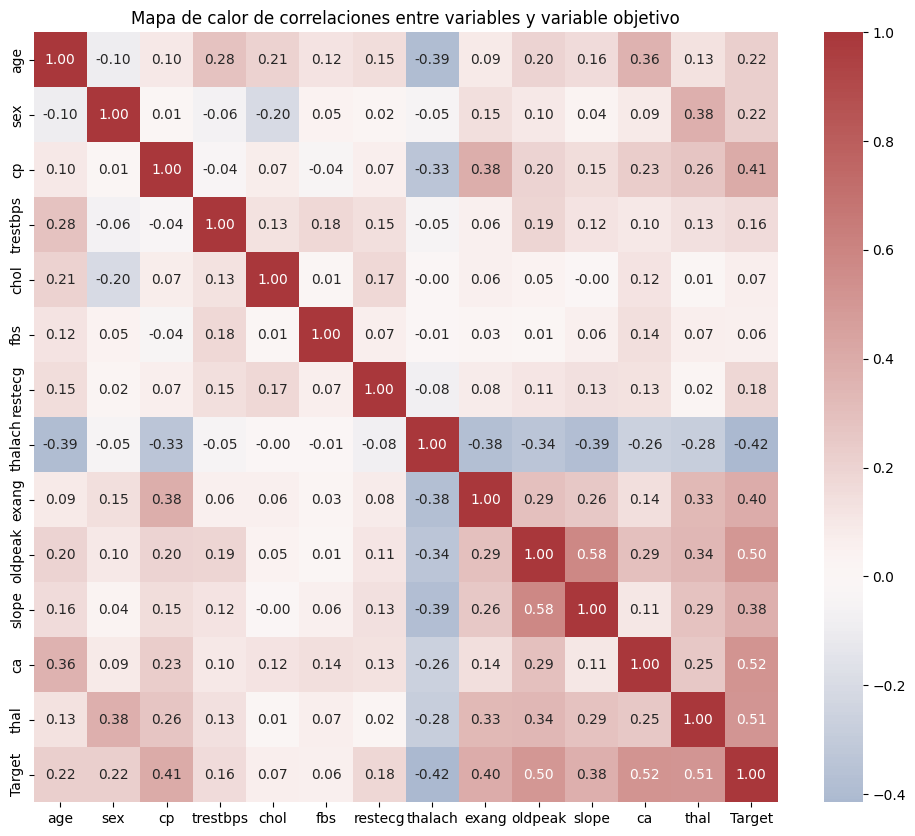

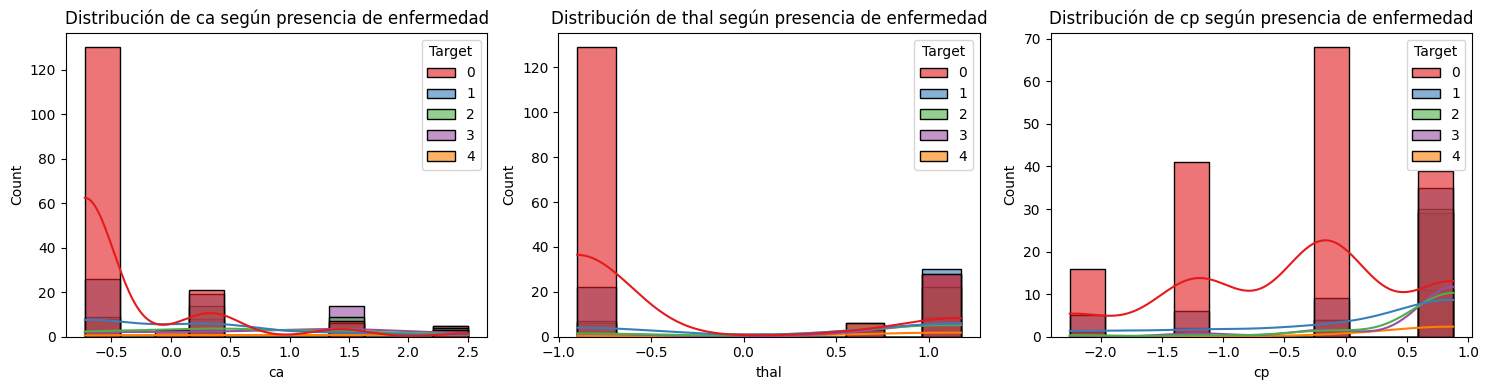

In [20]:
# Correlación entre variables incluyendo la variable objetivo 'y' (enfermedad cardíaca)
data_corr = pd.concat([pd.DataFrame(X_scaled, columns=feature_names), pd.Series(y, name='Target')], axis=1)
corr = data_corr.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Mapa de calor de correlaciones entre variables y variable objetivo')
plt.show()

# Histogramas para las variables más importantes (top 3)
top_vars = coef_df['Variable'].head(3).values

plt.figure(figsize=(15,4))
for i, var in enumerate(top_vars):
    plt.subplot(1,3,i+1)
    sns.histplot(data_corr, x=var, hue='Target', kde=True, palette='Set1', alpha=0.6)
    plt.title(f'Distribución de {var} según presencia de enfermedad')
plt.tight_layout()
plt.show()


Comparacion y conclusiones

                      Modelo  MAE / Accuracy      RMSE        R²
0  Regresión Lineal Múltiple        0.640051  0.846826  0.568642
1       Regresión Polinomial        0.901594  1.127067  0.235902
2        Regresión Logística        0.540984       NaN       NaN


<ipython-input-22-0fd3192bbc42>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MAE / Accuracy', data=metrics_summary, palette='muted')


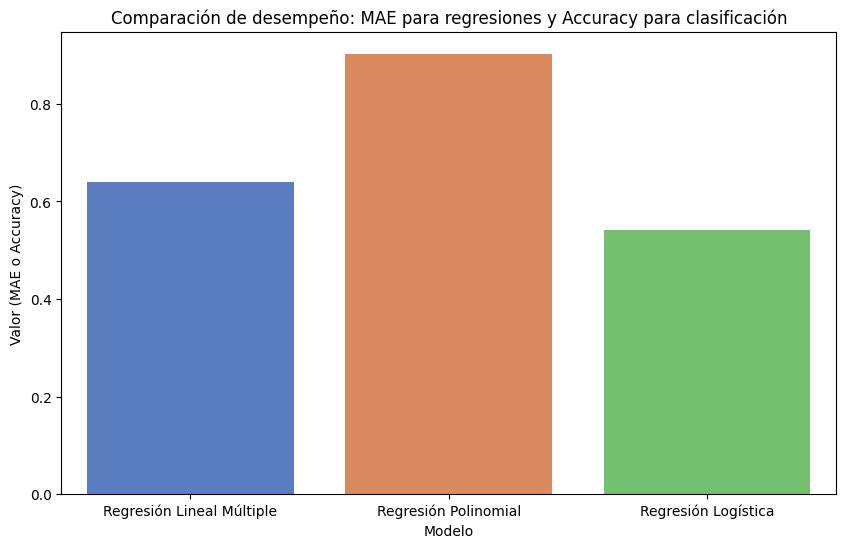

In [22]:
# Resumen de métricas (puedes ampliar según tus resultados)
metrics_summary = pd.DataFrame({
    'Modelo': ['Regresión Lineal Múltiple', 'Regresión Polinomial', 'Regresión Logística'],
    'MAE / Accuracy': [mae_rlm, mae_rp, acc_rl],
    'RMSE': [rmse_rlm, rmse_rp, np.nan],
    'R²': [r2_rlm, r2_rp, np.nan]
})

print(metrics_summary)
plt.figure(figsize=(10,6))
sns.barplot(x='Modelo', y='MAE / Accuracy', data=metrics_summary, palette='muted')
plt.title('Comparación de desempeño: MAE para regresiones y Accuracy para clasificación')
plt.ylabel('Valor (MAE o Accuracy)')
plt.show()


DATA SETS 2

Energy Efficiency Dataset, Link "https://archive.ics.uci.edu/dataset/242/energy+efficiency"


***CARGA***

In [9]:
# Paso 1: Subir el archivo desde tu computadora
from google.colab import files
uploaded = files.upload()


Saving ENB2012_data.xlsx to ENB2012_data (2).xlsx


***lIMPIEZA Y NORMALIZACION DE DATOS***

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Leer archivo Excel
df = pd.read_excel("ENB2012_data (2).xlsx")

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Renombrar columnas si es necesario (algunos archivos traen columnas sin nombre)
columnas = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
            'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution',
            'Heating Load', 'Cooling Load']

df.columns = columnas

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Separar características (X) y salidas (y)
X = df.iloc[:, :-2]  # Variables predictoras
y = df.iloc[:, -2:]  # Variables objetivo

# Normalizar las características
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combinar X normalizado con y original
df_final = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

# Ver los primeros datos normalizados
print("\nDatos normalizados:")
print(df_final.head())

# (Opcional


Primeras filas del dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Valores nulos por columna:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Datos normalizados:
   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              1.000000      0.000000   0.285714   0.000000             1.0   
1              1.000000      0.000000   0.285714   0.000000           

Análisis descriptivo: Estadísticos como la media, mediana, moda, varianza, percentiles 25%, 50%, 75%, mínimo y máximo, matriz de correlación.
Gráficos de dispersión (Scatter), Box Plot, Histogramas, Barra, línea, Pares de variables.


In [13]:
#Análisis Descriptivo
import numpy as np

# Estadísticos descriptivos básicos
desc = df_norm.describe().T  # transpuesta para mejor visualización
desc['median'] = df_norm.median()
desc['mode'] = df_norm.mode().iloc[0]
desc['variance'] = df_norm.var()

# Mostrar tabla con media, mediana, moda, varianza, percentiles, min y max
desc[['mean', 'median', 'mode', 'min', '25%', '50%', '75%', 'max', 'variance']]


,mean,median,mode,min,25%,50%,75%,max,variance
Relative Compactness,0.400463,0.361111,0.000000,0.0,0.173611,0.361111,0.583333,1.0,0.086334
Surface Area,0.534722,0.541667,0.000000,0.0,0.312500,0.541667,0.770833,1.0,0.089768
Wall Area,0.428571,0.428571,0.285714,0.0,0.285714,0.428571,0.571429,1.0,0.064710
Roof Area,0.601852,0.666667,1.000000,0.0,0.277778,0.666667,1.000000,1.0,0.167828
Overall Height,0.500000,0.500000,0.000000,0.0,0.000000,0.500000,1.000000,1.0,0.250326
Orientation,0.500000,0.500000,0.000000,0.0,0.250000,0.500000,0.750000,1.0,0.139070
Glazing Area,0.585938,0.625000,0.250000,0.0,0.250000,0.625000,1.000000,1.0,0.110923
Glazing Area Distribution,0.562500,0.600000,0.200000,0.0,0.350000,0.600000,0.800000,1.0,0.096219


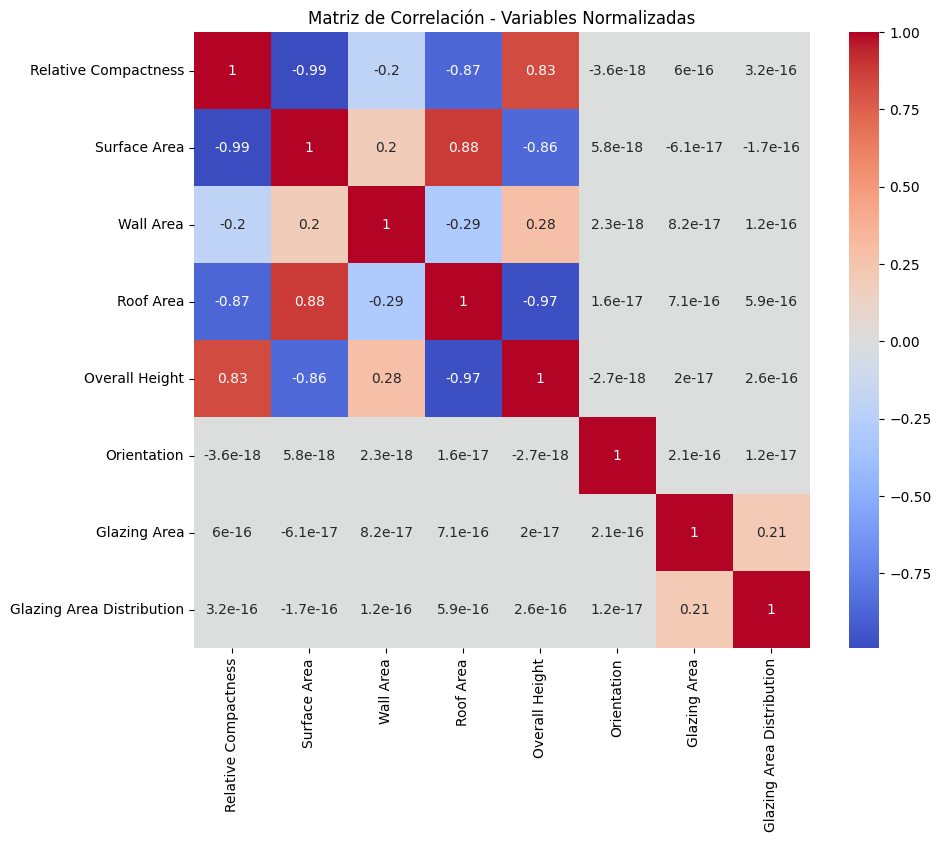

In [14]:
#Matriz de Correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_norm.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación - Variables Normalizadas')
plt.show()


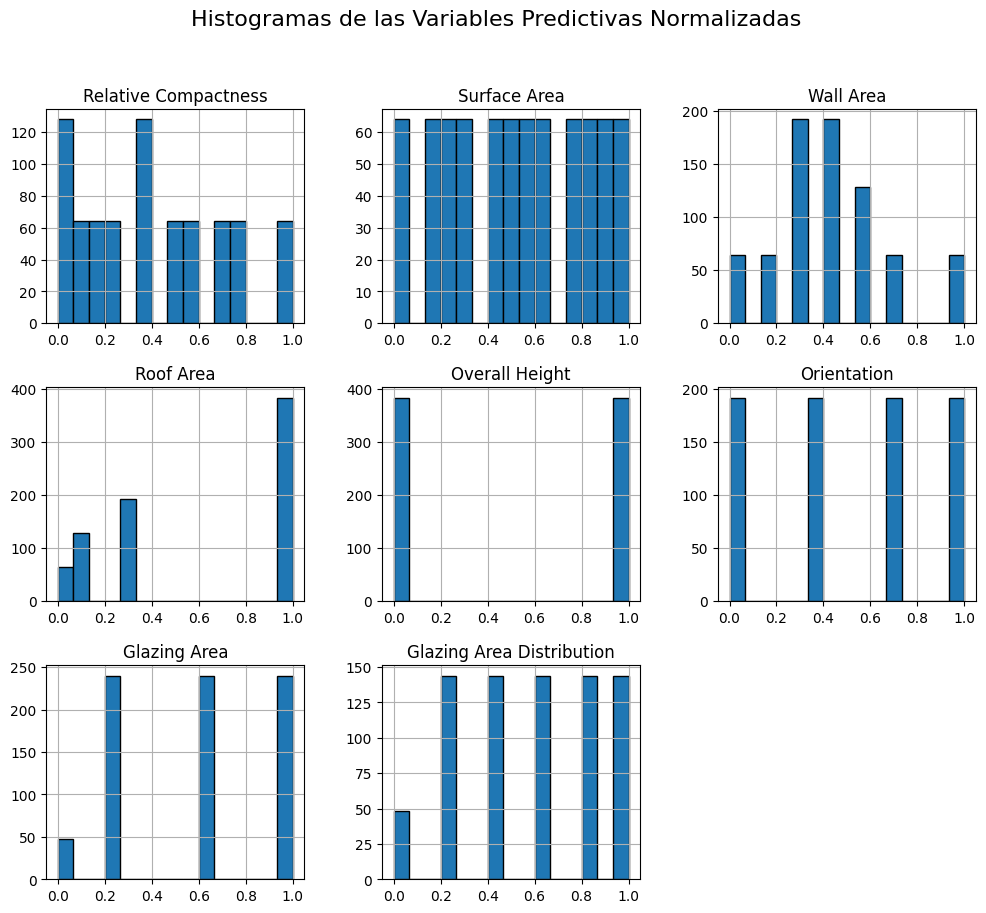

In [15]:
#Histogramas de cada variable
df_norm.hist(bins=15, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histogramas de las Variables Predictivas Normalizadas', fontsize=16)
plt.show()


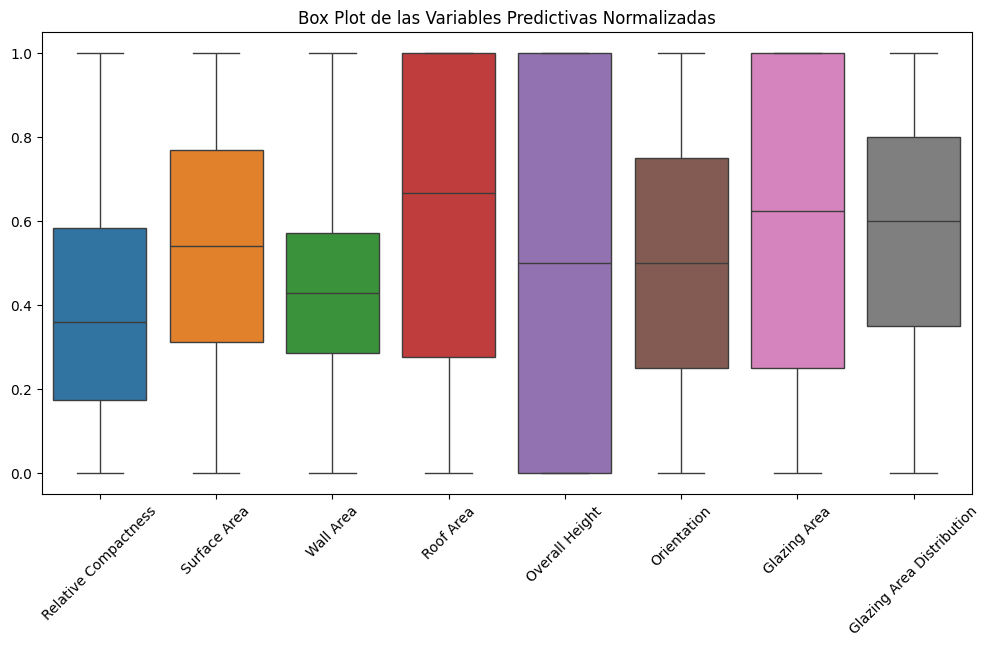

In [18]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_norm)
plt.title('Box Plot de las Variables Predictivas Normalizadas')
plt.xticks(rotation=45)
plt.show()


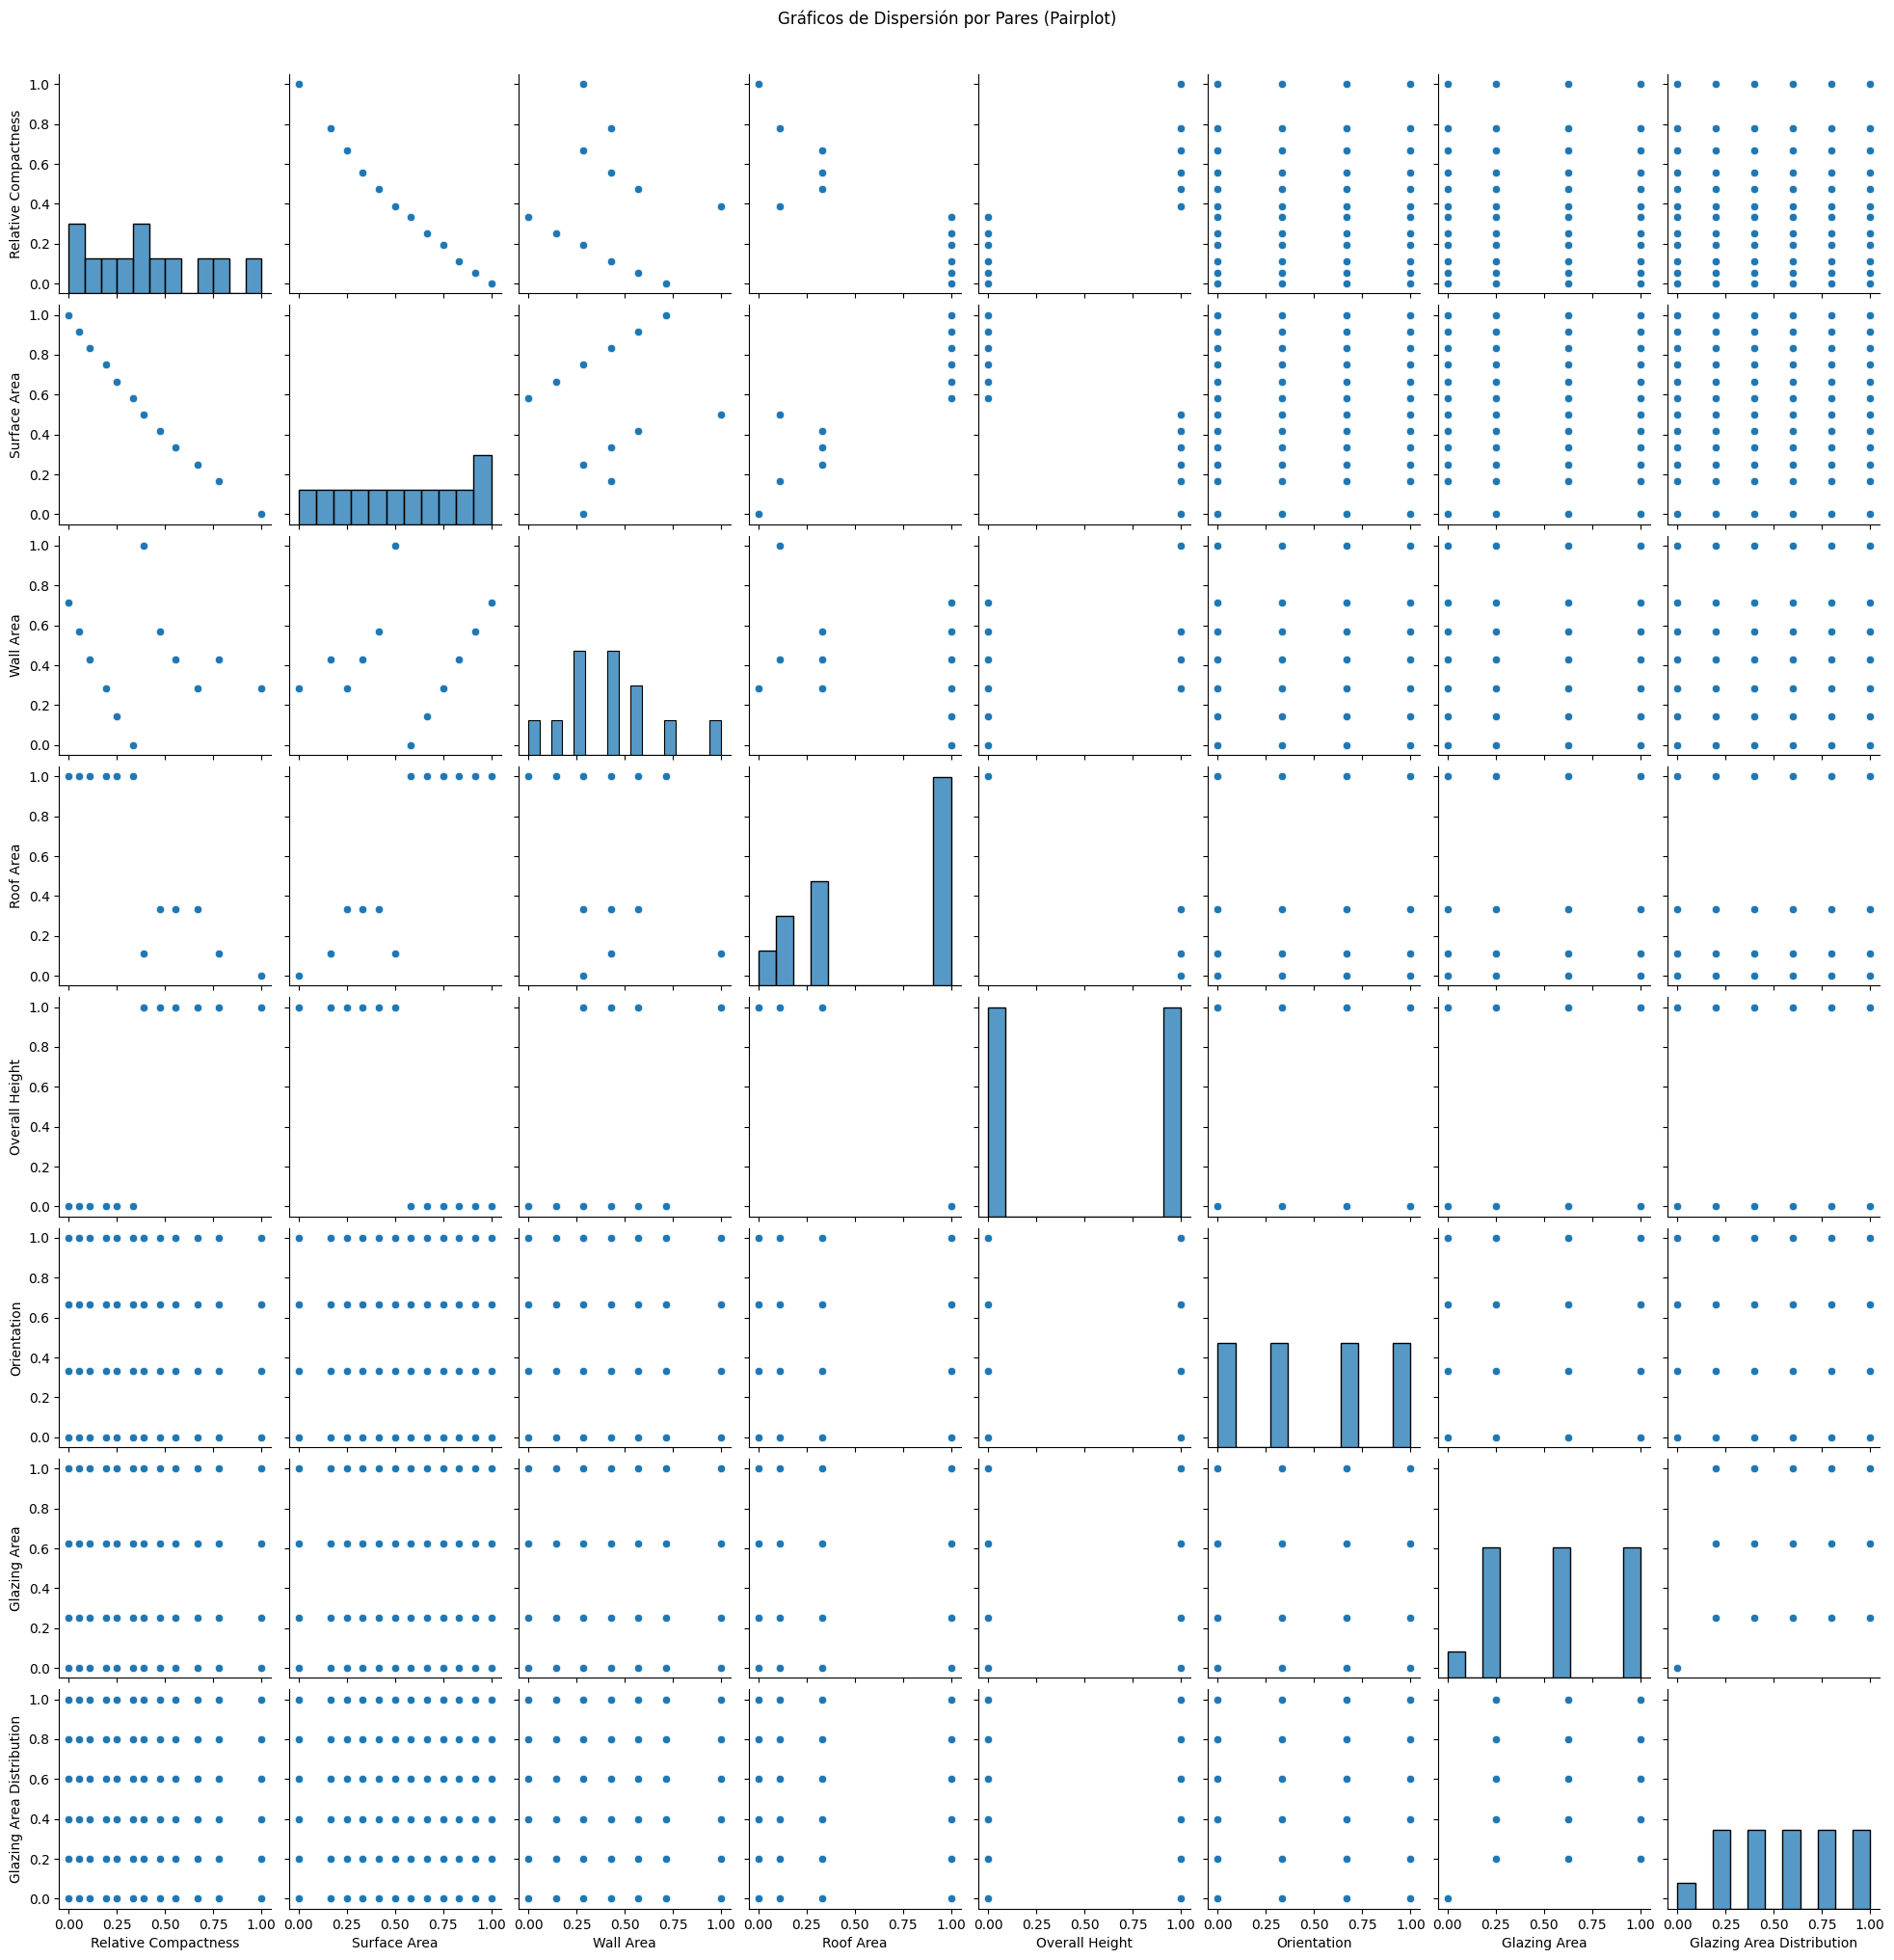

In [19]:
#Gráficos de Dispersión (Scatter Matrix / Pairplot)
sns.pairplot(df_norm)
plt.suptitle('Gráficos de Dispersión por Pares (Pairplot)', y=1.02)
plt.show()


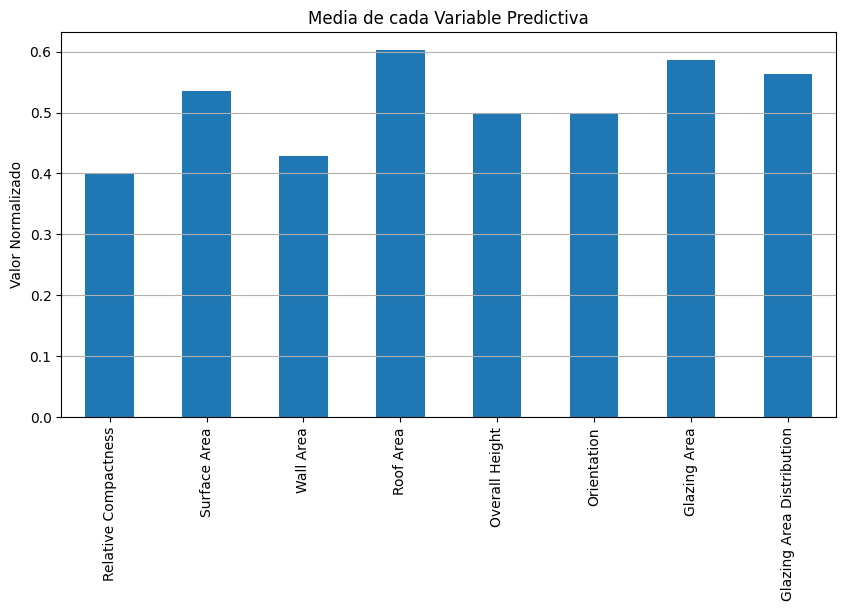

In [17]:
#ráficos de Barras (Media de cada variable)
df_norm.mean().plot(kind='bar', figsize=(10,5), title='Media de cada Variable Predictiva')
plt.ylabel('Valor Normalizado')
plt.grid(axis='y')
plt.show()


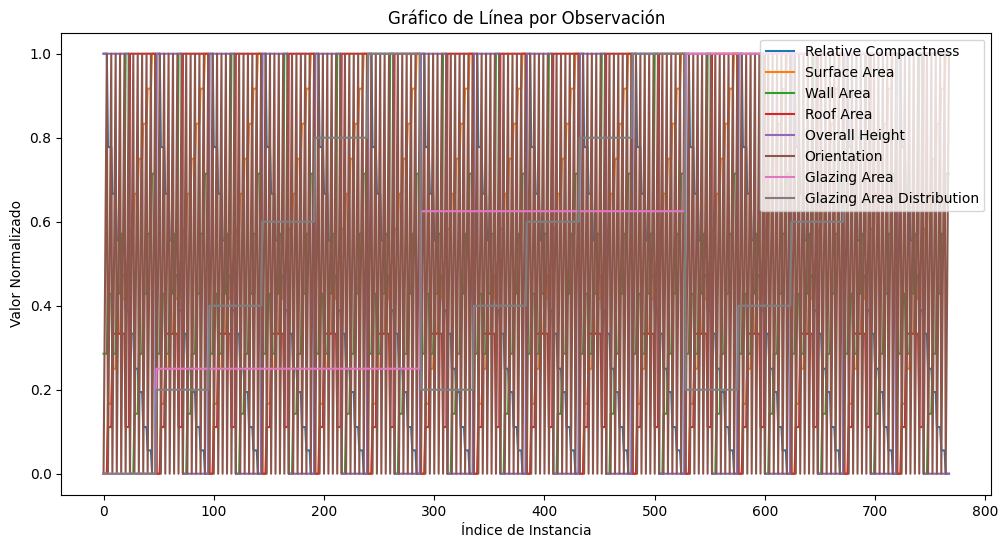

In [16]:
#Gráfico de Línea (evolución por índice)
df_norm.plot(figsize=(12, 6), title='Gráfico de Línea por Observación')
plt.xlabel('Índice de Instancia')
plt.ylabel('Valor Normalizado')
plt.legend(loc='upper right')
plt.show()


Regresión Lineal para Heating Load



Comparacion de modelos para Heating Load:
                           MAE      RMSE        R2
Regresion Lineal      2.182073  3.025427  0.912185
Regresion Polinomial  0.604174  0.802953  0.993814
Random Forest         0.360912  0.498491  0.997616


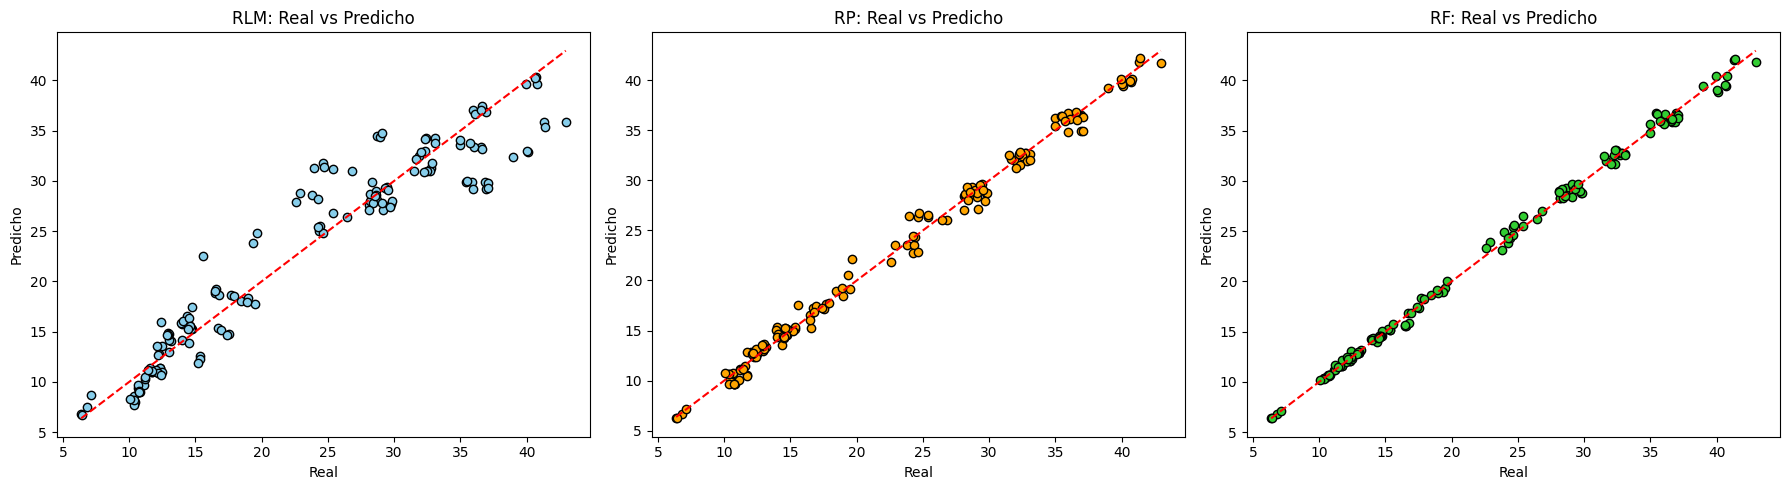

<ipython-input-21-d785d6bea12a>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")


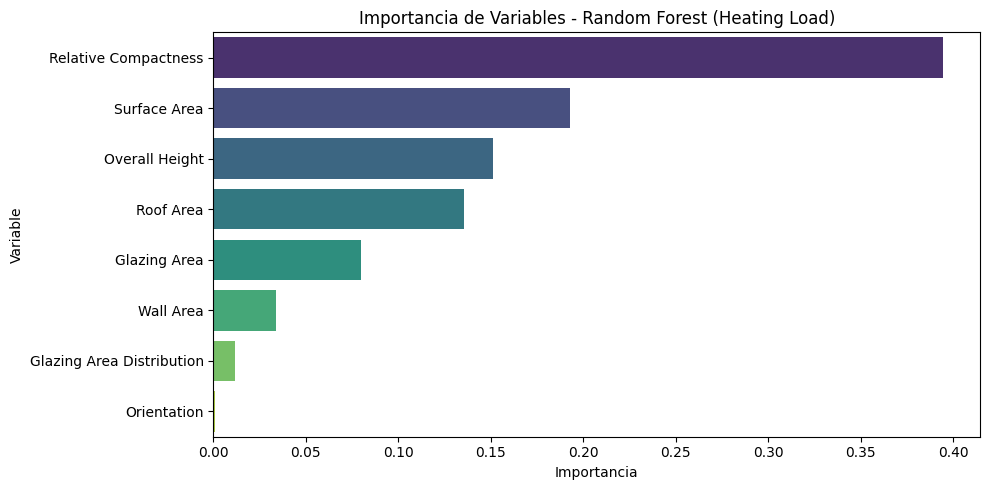

In [21]:
# Prediccion de Heating Load con RLM, RP y RF + Visualizaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Asumiendo que los datos ya estan limpios y normalizados ===
# X: variables predictoras normalizadas
y = df[['Heating Load', 'Cooling Load']]  # Original target values sin normalizar
X = df_norm.copy()  # Variables predictoras normalizadas

y_heating = y['Heating Load']

# === Separar conjunto de entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)

# === Inicializar estructura para comparar modelos ===
resultados = {}

# ====== MODELO 1: Regresion Lineal Multiple ======
rlm = LinearRegression()
rlm.fit(X_train, y_train)
y_pred_rlm = rlm.predict(X_test)

resultados['Regresion Lineal'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rlm),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rlm)),
    'R2': r2_score(y_test, y_pred_rlm)
}

# ====== MODELO 2: Regresion Polinomial (grado 2) ======
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

resultados['Regresion Polinomial'] = {
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    'R2': r2_score(y_test, y_pred_poly)
}

# ====== MODELO 3: Random Forest Regressor ======
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

resultados['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

# === Mostrar comparacion de resultados ===
resultados_df = pd.DataFrame(resultados).T
print("\n\nComparacion de modelos para Heating Load:")
print(resultados_df)

# === Visualizacion: Real vs Predicho ===
plt.figure(figsize=(18, 5))

# RL
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rlm, color='skyblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('RLM: Real vs Predicho')
plt.xlabel('Real'); plt.ylabel('Predicho')

# RP
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('RP: Real vs Predicho')
plt.xlabel('Real'); plt.ylabel('Predicho')

# RF
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color='limegreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('RF: Real vs Predicho')
plt.xlabel('Real'); plt.ylabel('Predicho')

plt.tight_layout()
plt.show()

# === Importancia de variables (RF) ===
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")
plt.title('Importancia de Variables - Random Forest (Heating Load)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


Regresión Lineal para Cooling Load

🔍 Evaluación de modelos para Cooling Load:

Regresión Lineal Múltiple:
  MAE:  2.20 | RMSE: 3.15 | R²: 0.8932
Regresión Polinomial (grado 2):
  MAE:  1.19 | RMSE: 1.73 | R²: 0.9678
Random Forest:
  MAE:  1.06 | RMSE: 1.73 | R²: 0.9678


<ipython-input-23-3140c0b85615>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_vals, palette="pastel")
<ipython-input-23-3140c0b85615>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_vals, palette="muted")
<ipython-input-23-3140c0b85615>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_vals, palette="deep")


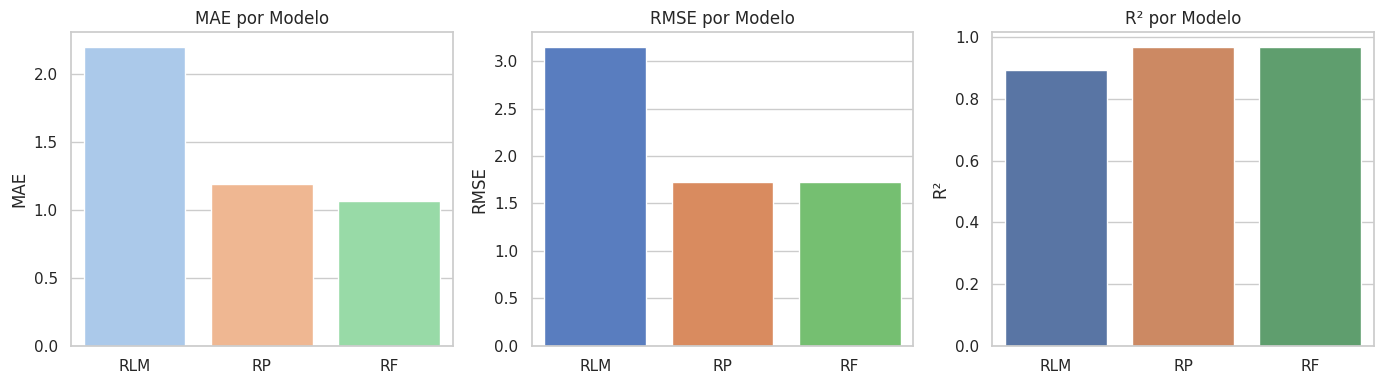

<ipython-input-23-3140c0b85615>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


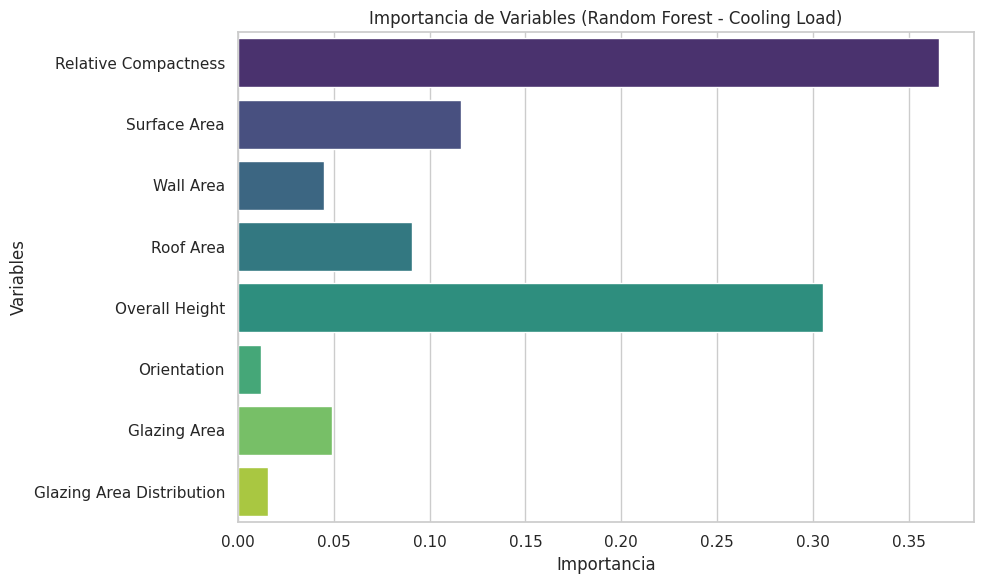

In [23]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Activar estilo visual de seaborn
sns.set(style="whitegrid")

# Verifica y elimina valores faltantes (muy importante para evitar errores en entrenamiento)
df_norm = df_norm.dropna()

# Definir variables predictoras (X) y variable objetivo (y)
X = df_norm.copy()
y_cooling = y['Cooling Load']  # Target: variable real (sin normalizar)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train_cool, y_test_cool = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# ===== Modelo 1: Regresión Lineal Múltiple =====
model_rlm = LinearRegression()
model_rlm.fit(X_train, y_train_cool)
y_pred_rlm = model_rlm.predict(X_test)

# Métricas RLM
mae_rlm = mean_absolute_error(y_test_cool, y_pred_rlm)
rmse_rlm = np.sqrt(mean_squared_error(y_test_cool, y_pred_rlm))
r2_rlm = r2_score(y_test_cool, y_pred_rlm)

# ===== Modelo 2: Regresión Polinomial (Grado 2) =====
model_rp = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_rp.fit(X_train, y_train_cool)
y_pred_rp = model_rp.predict(X_test)

# Métricas RP
mae_rp = mean_absolute_error(y_test_cool, y_pred_rp)
rmse_rp = np.sqrt(mean_squared_error(y_test_cool, y_pred_rp))
r2_rp = r2_score(y_test_cool, y_pred_rp)

# ===== Modelo 3: Random Forest =====
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train_cool)
y_pred_rf = model_rf.predict(X_test)

# Métricas RF
mae_rf = mean_absolute_error(y_test_cool, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_cool, y_pred_rf))
r2_rf = r2_score(y_test_cool, y_pred_rf)

# ===== Comparación de Resultados =====
print("🔍 Evaluación de modelos para Cooling Load:\n")
print("Regresión Lineal Múltiple:")
print(f"  MAE:  {mae_rlm:.2f} | RMSE: {rmse_rlm:.2f} | R²: {r2_rlm:.4f}")
print("Regresión Polinomial (grado 2):")
print(f"  MAE:  {mae_rp:.2f} | RMSE: {rmse_rp:.2f} | R²: {r2_rp:.4f}")
print("Random Forest:")
print(f"  MAE:  {mae_rf:.2f} | RMSE: {rmse_rf:.2f} | R²: {r2_rf:.4f}")

# ===== Visualización: Comparación gráfica =====
model_names = ['RLM', 'RP', 'RF']
mae_vals = [mae_rlm, mae_rp, mae_rf]
rmse_vals = [rmse_rlm, rmse_rp, rmse_rf]
r2_vals = [r2_rlm, r2_rp, r2_rf]

plt.figure(figsize=(14, 4))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x=model_names, y=mae_vals, palette="pastel")
plt.title('MAE por Modelo')
plt.ylabel('MAE')

# RMSE
plt.subplot(1, 3, 2)
sns.barplot(x=model_names, y=rmse_vals, palette="muted")
plt.title('RMSE por Modelo')
plt.ylabel('RMSE')

# R²
plt.subplot(1, 3, 3)
sns.barplot(x=model_names, y=r2_vals, palette="deep")
plt.title('R² por Modelo')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# ===== Importancia de variables (solo para Random Forest) =====
importances = model_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Importancia de Variables (Random Forest - Cooling Load)")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


	Mejore los modelos seleccionando las mejores variables significativas, y mitigando todos los problemas que puede enfrentar los métodos de predicción aplicados


=== Mejorando modelos para predecir Heating Load en eficiencia térmica de edificios ===
Variables significativas seleccionadas por Lasso para Heating Load:
['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

--- Resultados para Heating Load ---
Regresión Lineal Múltiple:
MAE: 2.1821, RMSE: 3.0254, R²: 0.9122

Regresión Polinomial (grado 2):
MAE: 0.6042, RMSE: 0.8030, R²: 0.9938


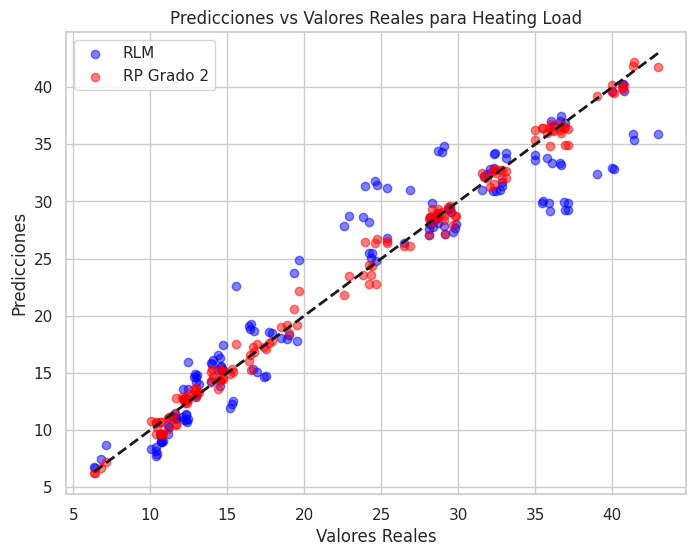

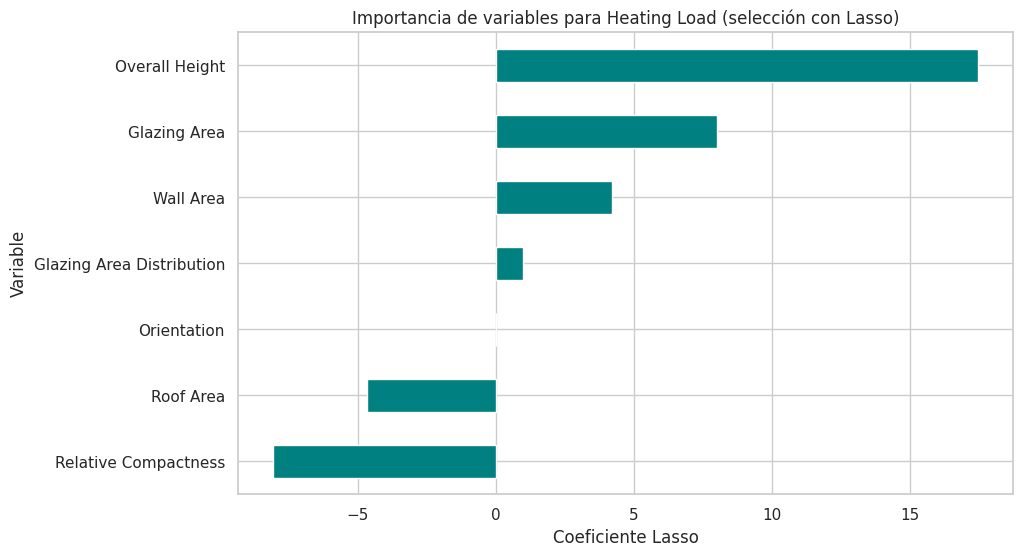


=== Mejorando modelos para predecir Cooling Load en eficiencia térmica de edificios ===
Variables significativas seleccionadas por Lasso para Cooling Load:
['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

--- Resultados para Cooling Load ---
Regresión Lineal Múltiple:
MAE: 2.1953, RMSE: 3.1454, R²: 0.8932

Regresión Polinomial (grado 2):
MAE: 1.1909, RMSE: 1.7260, R²: 0.9678


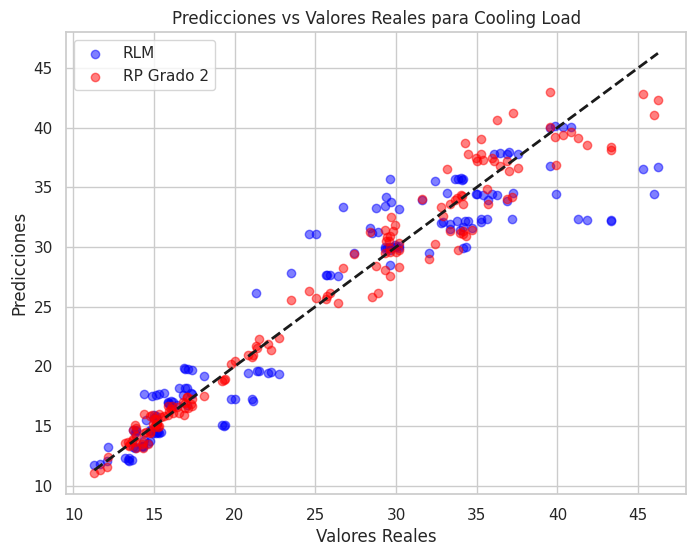

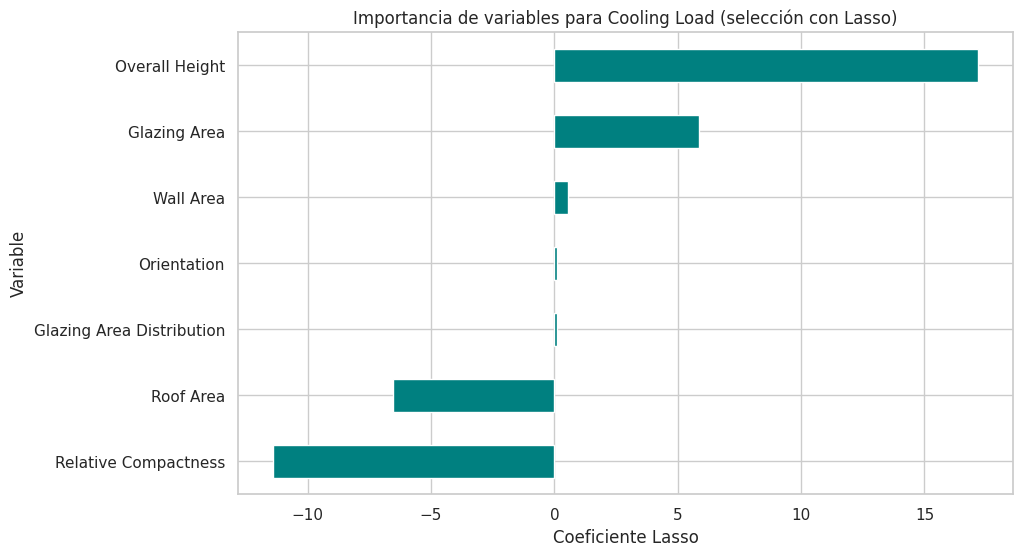

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Supongamos que ya tienes los datos normalizados en df_norm y variables objetivo en y

# Definir función para seleccionar variables importantes con Lasso y evaluar modelos
def mejorar_modelos(X, y, nombre_objetivo):
    print(f"\n=== Mejorando modelos para predecir {nombre_objetivo} en eficiencia térmica de edificios ===")

    # División de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Selección de variables importantes usando Lasso para reducir dimensionalidad
    lasso = Lasso(alpha=0.01, random_state=42)
    lasso.fit(X_train, y_train)

    # Variables seleccionadas por Lasso (coeficientes no nulos)
    coef = pd.Series(lasso.coef_, index=X.columns)
    variables_importantes = coef[coef != 0].index.tolist()
    print(f"Variables significativas seleccionadas por Lasso para {nombre_objetivo}:\n{variables_importantes}")

    # Filtrar datos para usar solo variables importantes
    X_train_sel = X_train[variables_importantes]
    X_test_sel = X_test[variables_importantes]

    # ===== Regresión Lineal Múltiple =====
    rlm = LinearRegression()
    rlm.fit(X_train_sel, y_train)
    y_pred_rlm = rlm.predict(X_test_sel)

    mae_rlm = mean_absolute_error(y_test, y_pred_rlm)
    rmse_rlm = np.sqrt(mean_squared_error(y_test, y_pred_rlm))
    r2_rlm = r2_score(y_test, y_pred_rlm)

    # ===== Regresión Polinomial Grado 2 =====
    rp = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    rp.fit(X_train_sel, y_train)
    y_pred_rp = rp.predict(X_test_sel)

    mae_rp = mean_absolute_error(y_test, y_pred_rp)
    rmse_rp = np.sqrt(mean_squared_error(y_test, y_pred_rp))
    r2_rp = r2_score(y_test, y_pred_rp)

    # Resultados
    print(f"\n--- Resultados para {nombre_objetivo} ---")
    print("Regresión Lineal Múltiple:")
    print(f"MAE: {mae_rlm:.4f}, RMSE: {rmse_rlm:.4f}, R²: {r2_rlm:.4f}")

    print("\nRegresión Polinomial (grado 2):")
    print(f"MAE: {mae_rp:.4f}, RMSE: {rmse_rp:.4f}, R²: {r2_rp:.4f}")

    # Visualización comparación predicciones vs reales
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred_rlm, color='blue', alpha=0.5, label='RLM')
    plt.scatter(y_test, y_pred_rp, color='red', alpha=0.5, label='RP Grado 2')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Valores Reales para {nombre_objetivo}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualización importancia de variables (coeficientes Lasso)
    plt.figure(figsize=(10,6))
    coef[variables_importantes].sort_values().plot(kind='barh', color='teal')
    plt.title(f'Importancia de variables para {nombre_objetivo} (selección con Lasso)')
    plt.xlabel('Coeficiente Lasso')
    plt.ylabel('Variable')
    plt.grid(True)
    plt.show()

# Ejecución para Heating Load
mejorar_modelos(df_norm, y['Heating Load'], 'Heating Load')

# Ejecución para Cooling Load
mejorar_modelos(df_norm, y['Cooling Load'], 'Cooling Load')



Variable significativa

Variables significativas para Heating Load:
Overall Height               17.457892
Glazing Area                  8.017970
Wall Area                     4.194639
Glazing Area Distribution     0.983975
Orientation                  -0.005755
Roof Area                    -4.676829
Relative Compactness         -8.059497
dtype: float64


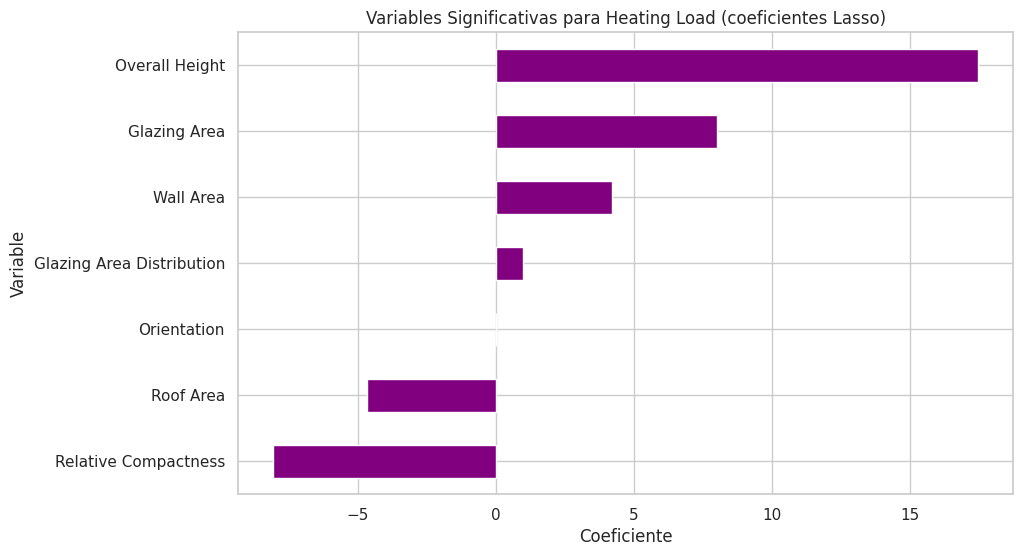

Variables significativas para Cooling Load:
Overall Height               17.164929
Glazing Area                  5.880375
Wall Area                     0.544355
Orientation                   0.110099
Glazing Area Distribution     0.097834
Roof Area                    -6.558521
Relative Compactness        -11.392851
dtype: float64


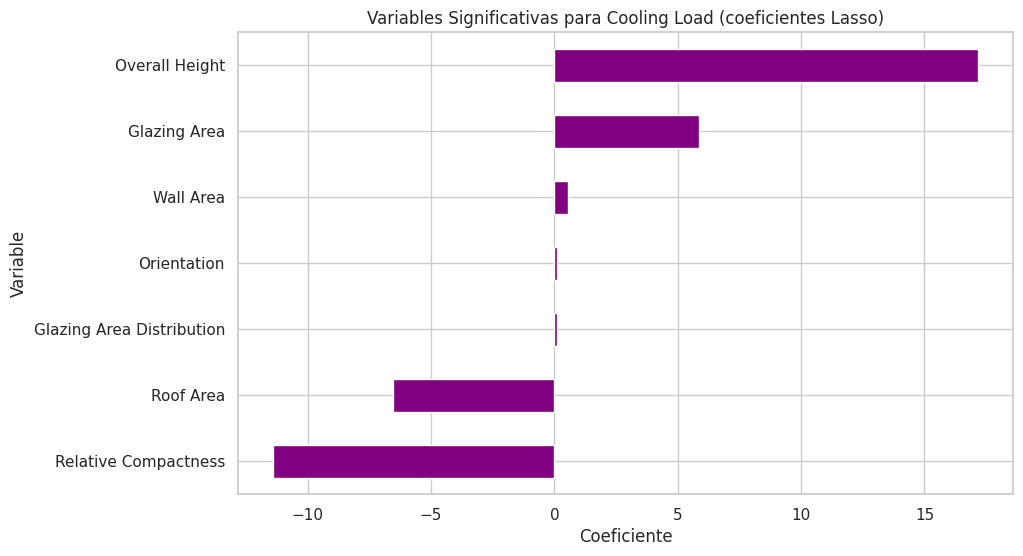

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

def mostrar_variables_significativas(X, y, nombre_objetivo, alpha=0.01):
    """
    Selecciona variables significativas usando Lasso y muestra un gráfico de barras con sus coeficientes.
    """
    print(f"Variables significativas para {nombre_objetivo}:")

    # Dividir datos para mantener consistencia
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar Lasso para selección de variables
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train, y_train)

    # Extraer coeficientes y filtrar variables no nulas
    coef = pd.Series(lasso.coef_, index=X.columns)
    variables_importantes = coef[coef != 0]

    if variables_importantes.empty:
        print("No se encontraron variables significativas con el alpha indicado.")
        return

    print(variables_importantes.sort_values(ascending=False))

    # Graficar coeficientes
    plt.figure(figsize=(10,6))
    variables_importantes.sort_values().plot(kind='barh', color='purple')
    plt.title(f'Variables Significativas para {nombre_objetivo} (coeficientes Lasso)')
    plt.xlabel('Coeficiente')
    plt.ylabel('Variable')
    plt.grid(True)
    plt.show()

# Ejemplo de uso para Heating Load
mostrar_variables_significativas(df_norm, y['Heating Load'], 'Heating Load')

# Ejemplo de uso para Cooling Load
mostrar_variables_significativas(df_norm, y['Cooling Load'], 'Cooling Load')
